In [1]:
import numpy as np
import tensorflow as tf

In [2]:
# Import MINST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("mnist", one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting mnist\train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting mnist\train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting mnist\t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting mnist\t10k-labels-idx1-ubyte.gz


In [4]:
mnist.train.images.shape

(55000, 784)

In [5]:
mnist.test.images.shape

(10000, 784)

In [6]:
mnist.train.labels.shape

(55000, 10)

In [7]:
import matplotlib.pyplot as plt

In [10]:
plt.imshow(mnist.train.images[3].reshape((28,28)))

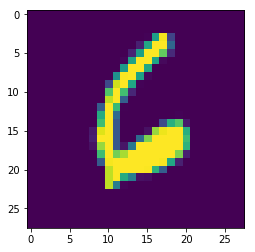

In [11]:
plt.show()

#### Spliting data into smaller portions

In [12]:
# In this example, we limit mnist data
Xtr, Ytr = mnist.train.next_batch(5000) #5000 for training (nn candidates)
Xte, Yte = mnist.test.next_batch(200) #200 for testing

In [13]:
Xtr.shape

(5000, 784)

In [14]:
Ytr.shape

(5000, 10)

#### Creating placeholders to enable passing data from external input

In [15]:
xtr = tf.placeholder("float", [None, 784])
xte = tf.placeholder("float", [784])

In [32]:
distance = tf.reduce_sum(tf.abs(tf.add(xtr, tf.negative(xte))), reduction_indices=1)

#### Prediction: Get min distance index (Nearest neighbor)

In [33]:
pred = tf.arg_min(distance, 0)

In [20]:
accuracy = 0.

In [21]:
init = tf.global_variables_initializer()

In [34]:
with tf.Session() as sess:
    sess.run(init)
    
    for i in range(len(Xte)):
        #Get nearest neighbor
        nn_index = sess.run(pred, feed_dict={xtr: Xtr, xte:Xte[i ,:]})
        print ("Test", i, "Prediction:", np.argmax(Ytr[nn_index]), \
            "True Class:", np.argmax(Yte[i]))
            
        if np.argmax(Ytr[nn_index]) == np.argmax(Yte[i]):
            accuracy += 1./len(Xte)
    print ('Done')
    print ("Accuracy : ", accuracy)

Test 0 Prediction: 0 True Class: 0
Test 1 Prediction: 6 True Class: 6
Test 2 Prediction: 3 True Class: 3
Test 3 Prediction: 9 True Class: 8
Test 4 Prediction: 4 True Class: 9
Test 5 Prediction: 5 True Class: 5
Test 6 Prediction: 9 True Class: 9
Test 7 Prediction: 4 True Class: 4
Test 8 Prediction: 6 True Class: 6
Test 9 Prediction: 5 True Class: 5
Test 10 Prediction: 4 True Class: 4
Test 11 Prediction: 5 True Class: 5
Test 12 Prediction: 2 True Class: 2
Test 13 Prediction: 5 True Class: 5
Test 14 Prediction: 0 True Class: 6
Test 15 Prediction: 0 True Class: 5
Test 16 Prediction: 1 True Class: 1
Test 17 Prediction: 4 True Class: 4
Test 18 Prediction: 9 True Class: 9
Test 19 Prediction: 0 True Class: 0
Test 20 Prediction: 5 True Class: 5
Test 21 Prediction: 1 True Class: 1
Test 22 Prediction: 3 True Class: 3
Test 23 Prediction: 4 True Class: 4
Test 24 Prediction: 3 True Class: 5
Test 25 Prediction: 7 True Class: 7
Test 26 Prediction: 2 True Class: 2
Test 27 Prediction: 0 True Class: 0
Te

In [29]:
tf.expand_dims(Xte[0,:],1)

<tf.Tensor 'ExpandDims:0' shape=(784, 1) dtype=float32>

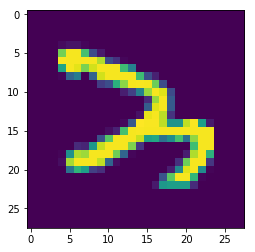

In [36]:
plt.imshow(Xte[189].reshape((28,28)))
plt.show()